# COVID-19 Image Classification

## Introduction
The COVID-19 pandemic has caused unprecedented disruptions in healthcare systems worldwide. One of the key challenges in controlling the spread of the disease is early detection and accurate diagnosis of the infected individuals. In this regard, medical imaging techniques such as chest X-rays and CT scans have proven to be effective tools for identifying COVID-19 cases. Machine learning algorithms, specifically convolutional neural networks (CNNs), have been shown to provide high accuracy in the classification of chest X-ray and CT images of COVID-19 patients. In this project, we aim to develop a CNN model for the classification of COVID-19, normal, and viral pneumonia cases using chest X-ray images.

## Objectives
The main objective of this project is to develop a CNN model for the classification of COVID-19, normal, and viral pneumonia cases using chest X-ray images. Specifically, we aim to achieve the following objectives:

- Collect a dataset of chest X-ray images of COVID-19, normal, and viral pneumonia cases from kaggle.
- Preprocess the image dataset by resizing and normalizing the images.
- Develop a CNN model architecture suitable for the classification of chest X-ray images.
- Train and evaluate the performance of the model on the dataset.
- Analyze the performance of the model using performance metrics such as accuracy, precision, recall, and F1-score.
- Provide insights and recommendations for future improvements in the model.

## Import required Libraries

In [22]:
#import dependecies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import ReduceLROnPlateau
import cv2
import os

## Loading the images

In [23]:
# Get image directory
train_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
test_path = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

## Display the normal, Covid and Viral Pneumonia Image Category

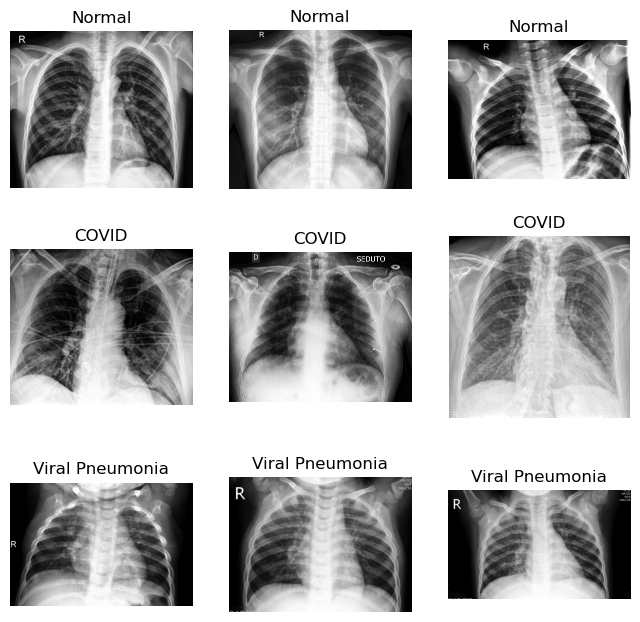

In [24]:
# Get the list of image files for each category
normal_images = [os.path.join(train_path, "Normal", f) for f in os.listdir(os.path.join(train_path, "Normal"))[:3]]
covid_images = [os.path.join(train_path, "Covid", f) for f in os.listdir(os.path.join(train_path, "Covid"))[:3]]
pneumonia_images = [os.path.join(train_path, "Viral Pneumonia", f) for f in os.listdir(os.path.join(train_path, "Viral Pneumonia"))[:3]]

# Display the images using matplotlib
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
for i, image_path in enumerate(normal_images + covid_images + pneumonia_images):
    img = mpimg.imread(image_path)
    ax = axs[i//3, i%3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    if i < 3:
        ax.set_title("Normal")
    elif i < 6:
        ax.set_title("COVID")
    else:
        ax.set_title("Viral Pneumonia")
plt.show()

## Preprocessing

In [25]:
# Define image size and batch size
img_width, img_height = 224, 224
batch_size = 32

# set up data generator for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')
# Set up the data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_path,
                                                   target_size=(img_width, img_height),
                                                   batch_size=batch_size,
                                                   class_mode='categorical')

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


## CNN Model

In [26]:
# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', 
                   include_top=False, 
                   input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers in the VGG16 model
base_model.trainable = False

# Add custom classification layers on top of the VGG16 model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

checkpoint = tf.keras.callbacks.ModelCheckpoint('model/vgg16_best.h5', monitor='acc', verbose=1, mode='max',save_best_only=True)
early = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",restore_best_weights=True, patience=5)

callbacks_list = [checkpoint,early]

model.summary()

## Training the Model

In [28]:
# Train the model on the training data and validate on the validation data
history = model.fit(
        train_generator,
        epochs=50,
        validation_data=test_generator,
        callbacks=callbacks_list,
        shuffle=False, 
        verbose=True
        )

Epoch 1/50
8/8 [==============================] - 100s 12s/step - loss: 1.1960 - accuracy: 0.3586 - val_loss: 1.0509 - val_accuracy: 0.3939
Epoch 2/50
8/8 [==============================] - 96s 12s/step - loss: 1.0871 - accuracy: 0.4382 - val_loss: 0.9257 - val_accuracy: 0.6667
Epoch 3/50
8/8 [==============================] - 97s 12s/step - loss: 0.9295 - accuracy: 0.5538 - val_loss: 0.8473 - val_accuracy: 0.7121
Epoch 4/50
8/8 [==============================] - 96s 12s/step - loss: 0.8233 - accuracy: 0.6614 - val_loss: 0.7237 - val_accuracy: 0.8333
Epoch 5/50
8/8 [==============================] - 98s 12s/step - loss: 0.7760 - accuracy: 0.6454 - val_loss: 0.6267 - val_accuracy: 0.8485
Epoch 6/50
8/8 [==============================] - 98s 12s/step - loss: 0.6952 - accuracy: 0.6892 - val_loss: 0.5541 - val_accuracy: 0.8636
Epoch 7/50
8/8 [==============================] - 98s 12s/step - loss: 0.6052 - accuracy: 0.7610 - val_loss: 0.5102 - val_accuracy: 0.7879
Epoch 8/50
8/8 [==========

In [ ]:
# train the model
#model.fit(train_generator,
          #steps_per_epoch=train_generator.samples // train_generator.batch_size,
          #epochs=10,
          #callbacks=[reduce_lr],
          #validation_data=test_generator,
          #validation_steps=test_generator.samples // test_generator.batch_size
          #)

## Model Evaluation

In [29]:
# evaluate the model
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print(f'The testing accuracy is :', round(test_acc*100, 2),'%')
print(f'The testing loss is :', round(test_loss, 4))

3/3 - 20s - loss: 0.1392 - accuracy: 0.9394 - 20s/epoch - 7s/step
The testing accuracy is : 93.94 %
The testing loss is : 0.1392


#### __Confusion matrix and the Classification Report__

In [35]:
# classification_report and confusion_matrix

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Get the true labels
y_true = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm);

3/3 [==============================] - 20s 5s/step


In [34]:
# Generate the classification report
cr = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print('Classification Report:')
print(cr);

## Training and validation accuracy Plot 

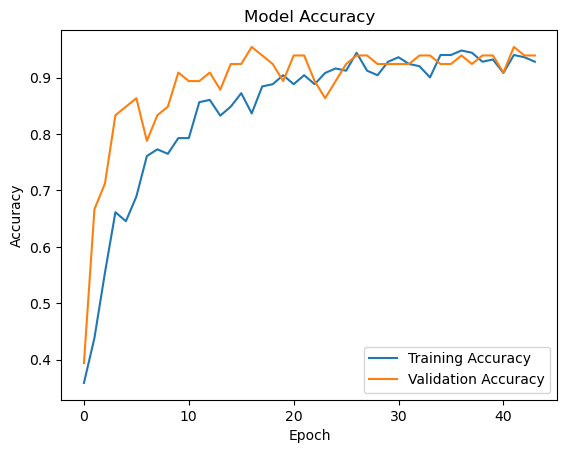

In [33]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Observation
The testing accuracy is 94%. However, the f1 score, precision and recall needs to improved.